In [1]:
import random
import numpy as np
from numpy import ogrid
from numpy.linalg import eig
import matplotlib.pyplot as plt
import cmath
# Enable interactive plot
%matplotlib notebook
from tabulate import tabulate
import matplotlib.animation as anim
import mplcyberpunk

plt.style.use("pusheen")  # to poster design


color = ['#83b692','#f9ada0', '#f9627d', '#c65b7c', '#5b3758']

In [2]:
r_n = np.linspace(-1.5,1.5,100)

In [3]:
onda = np.zeros((100,301),dtype = 'complex_')
pote = np.zeros((100,301))

for i in range(0,301,1):
    onda[:,i] = np.load('./data0_g/Wavepacket/'+str(i)+'-wave.npy')*10
    pote[:,i] = np.load('./data0_g/Potential/'+str(i)+'-potential.npy')*(1/1.5936e-3)
    
    

    

In [4]:
densidad = np.abs(onda)

<IPython.core.display.Javascript object>


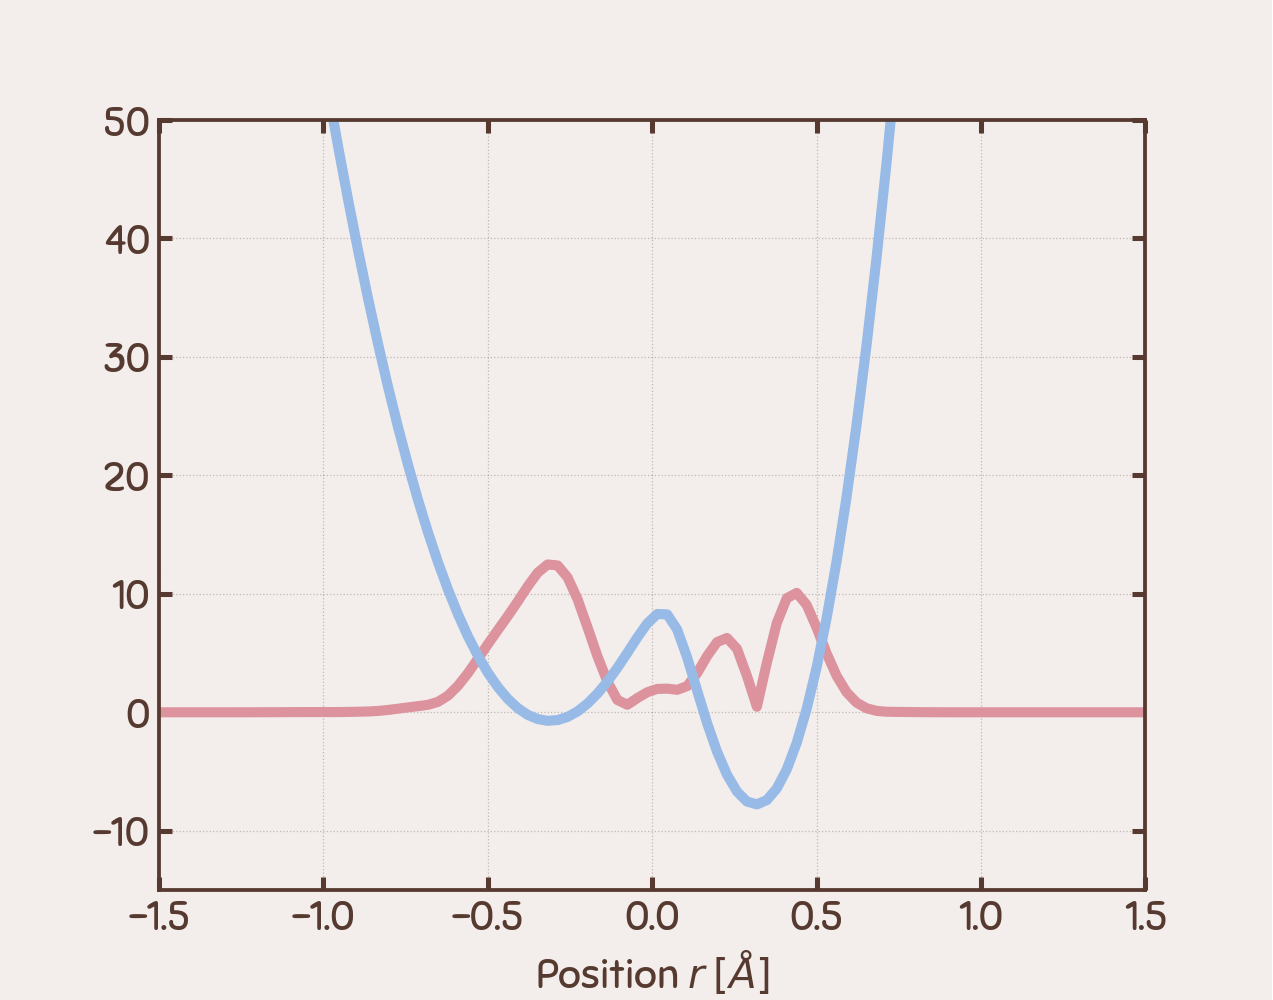

In [17]:

x = []
y = []

x1 = []
y1 = []

x2 = []
y2 = []

x3 = []
y3 = []


fig, ax = plt.subplots()

ax.set_xlim([-1.5, 1.5])
ax.set_ylim([-15,50])
ax.set_xlabel('Position $r$ $[\AA]$')
#ax.set_title(r"Evolución temporal")

lwaver,  = ax.plot(x, y, "-", color = color[0])
lwavei,  = ax.plot(x2, y2, "-", color = color[1])
dens, = ax.plot(x3, y3, '-', linewidth=4.0)#, color = color[4])
potent, = ax.plot(x1, y1, '-', linewidth=4.0, color='C4')#, color = color[2])




def shift(frame):
    ''' 
    lwaver.set_xdata(r_n)
    lwaver.set_ydata((onda[:,frame].real))
    lwaver.set_label('$\psi(r,t)_r$ t = '+str(frame)+' fs')
         
    lwavei.set_xdata(r_n)
    lwavei.set_ydata((onda[:,frame].imag))
    lwavei.set_label('$\psi(r,t)_i$ t = '+str(frame)+' fs')
    '''
    
    potent.set_xdata(r_n)
    potent.set_ydata(pote[:,frame])
    potent.set_label('$V(r,t)$ t = '+str(frame)+' fs')
    
      
    dens.set_xdata(r_n)
    dens.set_ydata(densidad[:,frame])
    dens.set_label('$|\psi(r,t)|*10$ t = '+str(frame)+' fs')
    
    
    #ax.legend()
    

    #return (potent, lwaver,)
    return (potent, lwaver, lwavei,)


ani = anim.FuncAnimation(fig, shift, frames = 210, blit = False)

# to save gif
f = r"./Poster-animation-dens&pot.gif" 
writergif = anim.PillowWriter(fps=100)
ani.save(f, writer=writergif)






